In [1]:
import json
import pprint
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import requests

response = requests.get("	https://datacenter.taichung.gov.tw/swagger/OpenData/9af00e84-473a-4f3d-99be-b875d8e86256")
content = response.content
json_tree = json.loads(content)

In [2]:
for bike_rent_records in json_tree['retVal']:
    leftRatio = float(bike_rent_records["sbi"]) / float(bike_rent_records["tot"]) * 100

In [3]:
dataframe = pd.DataFrame(json_tree['retVal'])
dataframe['lat']=dataframe['lat'].astype(float)
dataframe['lng']=dataframe['lng'].astype(float)
dataframe['sbi']=dataframe['sbi'].astype(float)
w = dataframe['lat']
v = dataframe['lng']
k = dataframe['sbi']
dataframe

,scity,scityen,sna,sarea,ar,snaen,sareaen,aren,sno,tot,sbi,mday,lat,lng,bemp,act,sbi_detail
0,台中市,Taichung City,YouBike2.0_后里國中,后里區,中眉路169號(西北側),YouBike2.0_Houli Junior High School,Houli Dist,"No.169, Zhongmei Rd. (Northwest)",500621030,20,7.0,20221002165315,24.308615,120.692915,13,1,"{'yb2': '7', 'eyb': '0'}"
1,台中市,Taichung City,YouBike2.0_四德國小,霧峰區,四德路504號,YouBike2.0_Si De Elementary School,Wufeng Dist,"No.504, Side Rd.",500622016,10,5.0,20221002170214,24.060820,120.667830,5,1,"{'yb2': '4', 'eyb': '1'}"
2,台中市,Taichung City,YouBike2.0_臺中市立圖書館神岡分館,神岡區,中山路1460號,YouBike2.0_Taichung Public Library Shengang Br...,Shengang Dist,"No.1460, Zhongshan Rd.",500618013,8,3.0,20221002221839,24.258990,120.661000,5,1,"{'yb2': '3', 'eyb': '0'}"
3,台中市,Taichung City,YouBike2.0_太原足球場,北屯區,建和路一段/建軍一街口(西南側),YouBike2.0_Taiyuan Football Stadium,Beitun Dist,"Sec. 1, Jianhe Rd. & Jianjun 1st St. Intersect...",500608161,17,7.0,20221002180440,24.160930,120.720330,10,1,"{'yb2': '7', 'eyb': '0'}"
4,台中市,Taichung City,YouBike2.0_黎新公園(龍富路),南屯區,龍富路五段25號(前),YouBike2.0_Li Xin Park (Longfu Rd.),Nantun Dist,"No.25, Sec. 5, Longfu Rd. (Opposite)",500607112,15,2.0,20221002180940,24.153020,120.626800,13,1,"{'yb2': '2', 'eyb': '0'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,台中市,Taichung City,YouBike2.0_捷運九德站(興華街),烏日區,興華街/自強街口(東北側),YouBike2.0_TMRT Jiude Sta. (Xinghua St.),Wuri Dist,Xinghua St. & Ziqiang St. Intersection (Northe...,500617002,51,0.0,20221002232904,24.110220,120.634530,51,1,"{'yb2': '0', 'eyb': '0'}"
1198,台中市,Taichung City,YouBike2.0_捷運烏日站(平等路),烏日區,平等路/光日路口,YouBike2.0_TMRT Wuri Sta. (Pingdeng Rd.),Wuri Dist,Pingdeng Rd. & Guangri Rd. Intersection,500617003,20,8.0,20221002224239,24.108330,120.625060,12,1,"{'yb2': '8', 'eyb': '0'}"
1199,台中市,Taichung City,YouBike2.0_臺灣大道文心路口(西北側),西屯區,台灣大道三段/文心路二段口(西北側),YouBike2.0_Taiwan Blvd. / Wenxin Rd. (Northwest),Xitun Dist,Taiwan Blvd. / Wenxin Rd. (Northwest),500606006,30,5.0,20221003005519,24.163000,120.649450,25,1,"{'yb2': '5', 'eyb': '0'}"
1200,台中市,Taichung City,YouBike2.0_幸福兒童公園,西屯區,櫻城一街85號(東南側),YouBike2.0_Xingfu Children's Park,Xitun Dist,"No. 85, Yingcheng 1st St. (Southeast)",500606009,10,7.0,20221003013304,24.172330,120.652110,3,1,"{'yb2': '7', 'eyb': '0'}"


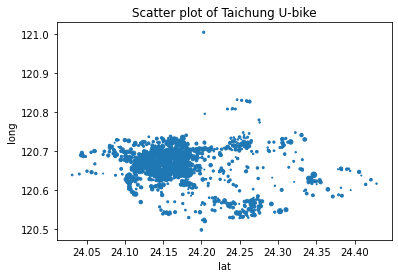

In [4]:
plt.scatter(w, v, k)
plt.title('Scatter plot of Taichung U-bike')
plt.xlabel('lat')
plt.ylabel('long')
plt.savefig('DEDA_410707007_HW2_Scraping with Taichung YouBike dataset')
plt.show()

In [5]:
import folium
from folium.plugins import MarkerCluster
import numpy as np
import matplotlib.pyplot as plt

u_bike = folium.Map(location= [24.136807, 120.684875], zoom_start=13 )


for i in range(0,1202):
    pop_text=str(dataframe['sarea'][i]) + '</br>' \
            '場站名稱: ' +str(dataframe['sna'][i]) + '</br>' \
            '地址: ' +str(dataframe['ar'][i]) + '</br>' \
            '總停車格: ' +str(dataframe['tot'][i]) + '</br>' \
            '目前車輛數量: ' +str(dataframe['sbi'][i]) + '</br>' \
            '可還車位數: ' +str(dataframe['bemp'][i]) 

    folium.Marker([dataframe['lat'][i], dataframe['lng'][i]], icon = folium.Icon(icon='heart', color = 'beige'), popup = folium.Popup(pop_text, max_width=1000)).add_to(u_bike)
u_bike.save("DEDA_410707007_HW2_Scraping with Taichung YouBike dataset.html")
u_bike